# Data exploration

This notebook looks at the data used.

In [3]:
import os
import random
from image_to_poem.data.kaggle_poems import KagglePoems
from image_to_poem.data.prep_data import load_json_file
from nltk.tokenize import word_tokenize
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

DATA_PATH = 'data/'

## Kaggle poems

The Kaggle poems consists of two sub data sets: "topics" and "forms". In topics the poems are sorted into folders depending on the topics they describe. In forms the poems are sorted into folders depending on the form they are written in.

### Topics exploration

Below we take a look at the available topics.

In [4]:
topics = os.listdir(DATA_PATH+"kaggle_poems/topics")
print(f"There are {len(topics)} topics in the dataset.")

There are 144 topics in the dataset.


In [5]:
topic_counts = {}

for topic in topics:
    topic_counts[topic] = len(os.listdir(DATA_PATH+"kaggle_poems/topics/"+topic))
topic_counts_values = np.array(list(topic_counts.values()))
print(f"There are {topic_counts_values.sum()} poems in the topics data set.\n")

# extract min and max
print(f"Each topic has between {topic_counts_values.min()} and {topic_counts_values.max()} poems.\n")

# get dist
topic_dist = [(x,y) for x,y in zip(*np.unique(topic_counts_values, return_counts=True))]
for topic_len, topic_c in topic_dist:
    print(f"There are {topic_c} topic(s) with {topic_len} poems")

There are 14334 poems in the topics data set.

Each topic has between 98 and 100 poems.

There are 11 topic(s) with 98 poems
There are 44 topic(s) with 99 poems
There are 89 topic(s) with 100 poems


### Forms exploration

In [6]:
forms = os.listdir(DATA_PATH+"kaggle_poems/forms")
print(f"There are {len(forms)} forms in the dataset.")

There are 135 forms in the dataset.


In [7]:
forms_counts = {}

for form in forms:
    forms_counts[form] = len(os.listdir(DATA_PATH+"kaggle_poems/forms/"+form))
form_counts_values = np.array(list(forms_counts.values()))
print(f"There are {form_counts_values.sum()} poems in the forms data set.\n")

print(f"Each form has between {form_counts_values.min()} and {form_counts_values.max()} poems.\n")

# get dist
forms_dist = [(x,y) for x,y in zip(*np.unique(form_counts_values, return_counts=True))]
for form_len, form_c in forms_dist:
    print(f"There are {form_c} form(s) with {form_len} poems")

There are 6322 poems in the forms data set.

Each form has between 1 and 100 poems.

There are 3 form(s) with 1 poems
There are 7 form(s) with 2 poems
There are 3 form(s) with 3 poems
There are 8 form(s) with 4 poems
There are 3 form(s) with 5 poems
There are 3 form(s) with 6 poems
There are 1 form(s) with 7 poems
There are 1 form(s) with 8 poems
There are 5 form(s) with 9 poems
There are 3 form(s) with 10 poems
There are 2 form(s) with 11 poems
There are 3 form(s) with 12 poems
There are 1 form(s) with 13 poems
There are 1 form(s) with 14 poems
There are 3 form(s) with 15 poems
There are 3 form(s) with 17 poems
There are 3 form(s) with 18 poems
There are 2 form(s) with 19 poems
There are 2 form(s) with 20 poems
There are 2 form(s) with 22 poems
There are 2 form(s) with 24 poems
There are 3 form(s) with 25 poems
There are 2 form(s) with 26 poems
There are 1 form(s) with 28 poems
There are 3 form(s) with 29 poems
There are 1 form(s) with 30 poems
There are 1 form(s) with 36 poems
There 

### Poems exploration

We start by loading the poems (this takes ~2 min)

In [8]:
poems = KagglePoems(DATA_PATH+"kaggle_poems/")
topic_poems = KagglePoems(DATA_PATH+"kaggle_poems/topics/")
forms_poems = KagglePoems(DATA_PATH+"kaggle_poems/forms/")

Reading poems: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6322/6322 [00:08<00:00, 742.18it/s]


We can then explore some stats for the poems

In [9]:
def print_stats(poems, name):
    print(f"Stats for {name} poems")
    for stat_name, stat_val in poems.stats.items():
        if stat_name == "avg_poem_length":
            print(f"\t{stat_name}: {stat_val:.2f}")
        else:
            print(f"\t{stat_name}: {stat_val}")

print_stats(poems, "all")
print_stats(topic_poems, "topic")
print_stats(forms_poems, "forms")

Stats for all poems
	num_poems: 20656
	num_words: 3843654
	vocab_size: 249816
	avg_poem_length: 186.08
Stats for topic poems
	num_poems: 14334
	num_words: 2631760
	vocab_size: 174579
	avg_poem_length: 183.60
Stats for forms poems
	num_poems: 6322
	num_words: 1211894
	vocab_size: 138244
	avg_poem_length: 191.69


Percentage of data points plotted: 98.315%


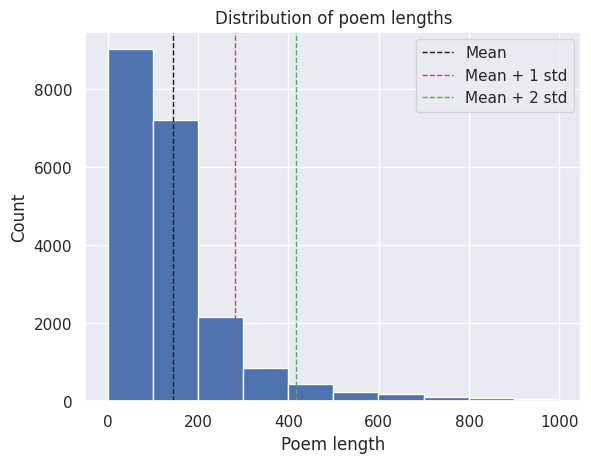

In [10]:
poem_lengths = np.array([len(words) for words in poems.words])
plot_lengths = poem_lengths[poem_lengths<1000]
print(f"Percentage of data points plotted: {len(plot_lengths)/len(poem_lengths):.3%}")

fig, ax = plt.subplots()
ax.hist(plot_lengths)
ax.set_title(f"Distribution of poem lengths")
ax.axvline(plot_lengths.mean(), color='k', linestyle='dashed', linewidth=1, label="Mean")
ax.axvline(plot_lengths.mean()+plot_lengths.std(), color='r', linestyle='dashed', linewidth=1, label="Mean + 1 std")
ax.axvline(plot_lengths.mean()+2*plot_lengths.std(), color='g', linestyle='dashed', linewidth=1, label="Mean + 2 std")
ax.legend()
ax.set(xlabel='Poem length', ylabel='Count')
plt.savefig(DATA_PATH + "kaggle_poem_hist.pdf")

plt.show()

Let's take a look at an example poem.

In [11]:
poems.get_example()

File index: 16437
Category: sijo
Title: Sijo Weighing In
Author: Caryl Ramsdale
------------------------
I know my friend well enough to trust him with other hearts.
Albeit, I have misgivings about trusting him with my own.
Time is my best friend.  I’ll take time measuring his wisdom.


## MultiM poem images

The MultiM data set consists of images along with poems. Not all image url could be loaded, thus we only kept the readable ones. Furthermore, we extended the dataset by adding an image caption to all images, the image captioning was done using the `image-to-text` model. 

In [12]:
data = load_json_file(DATA_PATH + "caption_poem.json")

In [13]:
data_points = len(data)
print(f"There are {data_points} (image, caption, poem) sets in the dataset.")

There are 7697 (image, caption, poem) sets in the dataset.


### Poems and Captions Exploration

Poems 

In [15]:
# get poem tokens using nltk's word tokenizer 
poem_toks = [data[i]["poem"].split() for i in range(data_points)]
# get poem lengths 
poem_toks_len = [len(toks) for toks in poem_toks]
# collect all tokens 
all_poem_toks = []
for toks in poem_toks:
    all_poem_toks += toks 

# print statistics 
print(f"#Tokens in poems \t= {len(all_poem_toks)}")
print(f"Average poem length \t= {np.average(poem_toks_len):.2f}")
print(f"Poem vocabulary size \t= {len(set(all_poem_toks))}")


#Tokens in poems 	= 317872
Average poem length 	= 41.30
Poem vocabulary size 	= 19240


Captions

In [17]:
# get poem tokens using nltk's word tokenizer 
cap_toks = [data[i]["caption"].split() for i in range(data_points)]
# get poem lengths 
cap_toks_len = [len(toks) for toks in cap_toks]
# collect all tokens 
all_cap_toks = []
for toks in cap_toks:
    all_cap_toks += toks 

# print statistics 
print(f"#Tokens in captions \t= {len(all_cap_toks)}")
print(f"Average caption length \t= {np.average(cap_toks_len):.2f}")
print(f"Caption vocabulary size = {len(set(all_cap_toks))}")

#Tokens in captions 	= 70006
Average caption length 	= 9.10
Caption vocabulary size = 1045


Plot a histogram over teir lengths

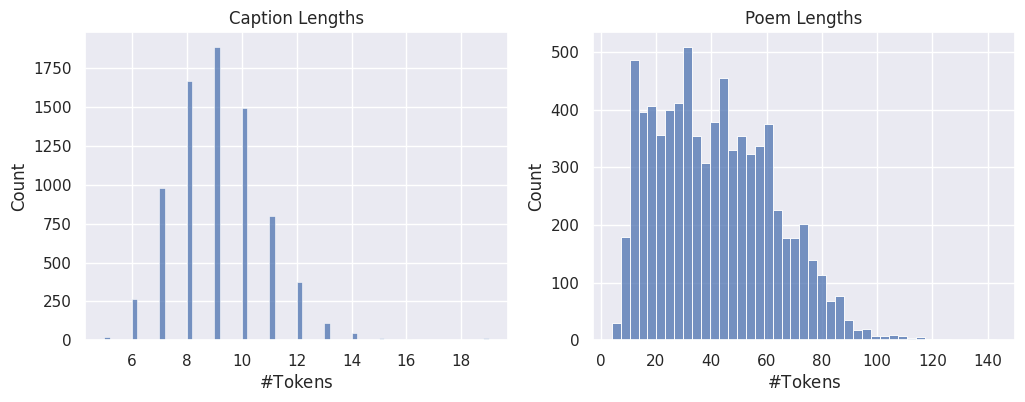

Upper bound length = 165


In [18]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
sns.histplot(cap_toks_len, ax=axs[0])
sns.histplot(poem_toks_len, ax=axs[1])
titles = ["Caption", "Poem"]
for i,ax in enumerate(axs):
    ax.set_xlabel("$\#$Tokens")
    ax.set_title(f"{titles[i]} Lengths")
plt.savefig(DATA_PATH + "cap_poem_hist.pdf")
plt.show()


# calculate upper bound length 
max_comb = np.max(cap_toks_len) + np.max(poem_toks_len) + 3     #+3 for [CLS] and 2*[SEP] tokens 
print("Upper bound length =", max_comb)

### Image exploration

Image ID: 53
Image URL: https://farm6.staticflickr.com/5481/10416264074_06305b702b.jpg


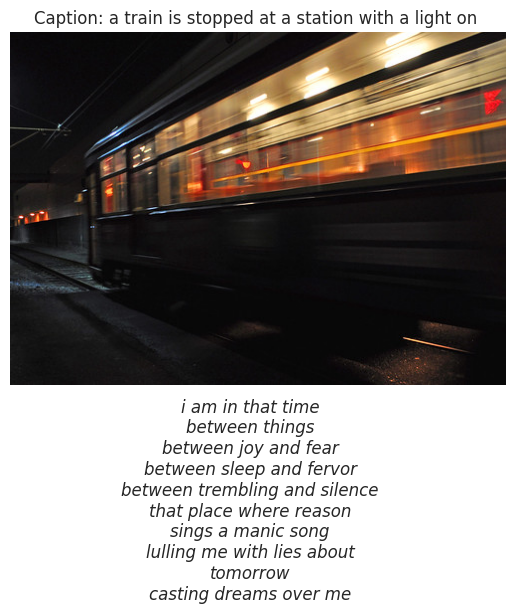

In [19]:
# choose random image
idx = random.randint(0, 50)

# print info
print("Image ID:", data[idx]["id"])
print("Image URL:", data[idx]["image_url"])

# display image
img = Image.open(DATA_PATH + "poem_images/" + str(data[idx]["id"]) + ".jpg")
plt.imshow(img)
plt.title("Caption: " + data[idx]["caption"])
plt.axis('off')

y_text = 0.1 if img.size[0] > img.size[1] else img.size[0]/img.size[1]*0.1
plt.figtext(0.5, y_text, data[idx]["poem"], horizontalalignment='center', fontsize=12, verticalalignment ="top", style ="italic", wrap=True)

plt.show()